# MACHINE LEARNING INTERNSHIP PROJECT
## Remark Skills

### Name : Rashmi S
### Data Science

**Description** : to predict the rate of the movies

Recommender System is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.

In [1]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the files

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [7]:
movies.shape

(10329, 3)

In [8]:
ratings.shape

(105339, 4)

In [9]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [11]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

## DATA VISUALIZATION 

In [14]:
sns.set_style('white')
%matplotlib inline

In [15]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [16]:
a=df
a=a.groupby('title')['rating'].mean()
a

title
'71 (2014)                                       3.500000
'Hellboy': The Seeds of Creation (2004)          3.000000
'Round Midnight (1986)                           2.500000
'Til There Was You (1997)                        4.000000
'burbs, The (1989)                               3.125000
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)    4.500000
xXx (2002)                                       2.958333
xXx: State of the Union (2005)                   2.071429
¡Three Amigos! (1986)                            3.012500
À nous la liberté (Freedom for Us) (1931)        3.000000
Name: rating, Length: 10323, dtype: float64

In [17]:
b=df
b=b.groupby('title')['rating'].count()
b

title
'71 (2014)                                        1
'Hellboy': The Seeds of Creation (2004)           1
'Round Midnight (1986)                            1
'Til There Was You (1997)                         3
'burbs, The (1989)                               20
                                                 ..
loudQUIETloud: A Film About the Pixies (2006)     1
xXx (2002)                                       24
xXx: State of the Union (2005)                    7
¡Three Amigos! (1986)                            40
À nous la liberté (Freedom for Us) (1931)         1
Name: rating, Length: 10323, dtype: int64

In [18]:
# making a new Dataframe
new_record= pd.DataFrame()

new_record['Average_ratings']=a

In [19]:
new_record['Count of total ratings']=b
new_record.head()

,Average_ratings,Count of total ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


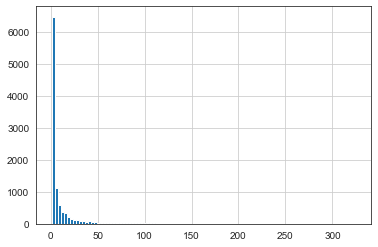

In [20]:
#plot the graph of no of rating columns

plt.figure.figsize=(10,9)
new_record['Count of total ratings'].hist(bins=100)

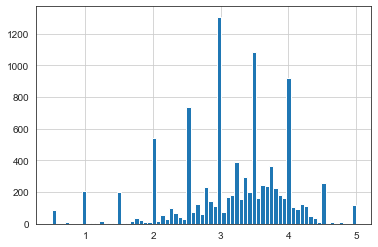

In [21]:
plt.figure.figsize=(10,9)
new_record['Average_ratings'].hist(bins=70)

In [22]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

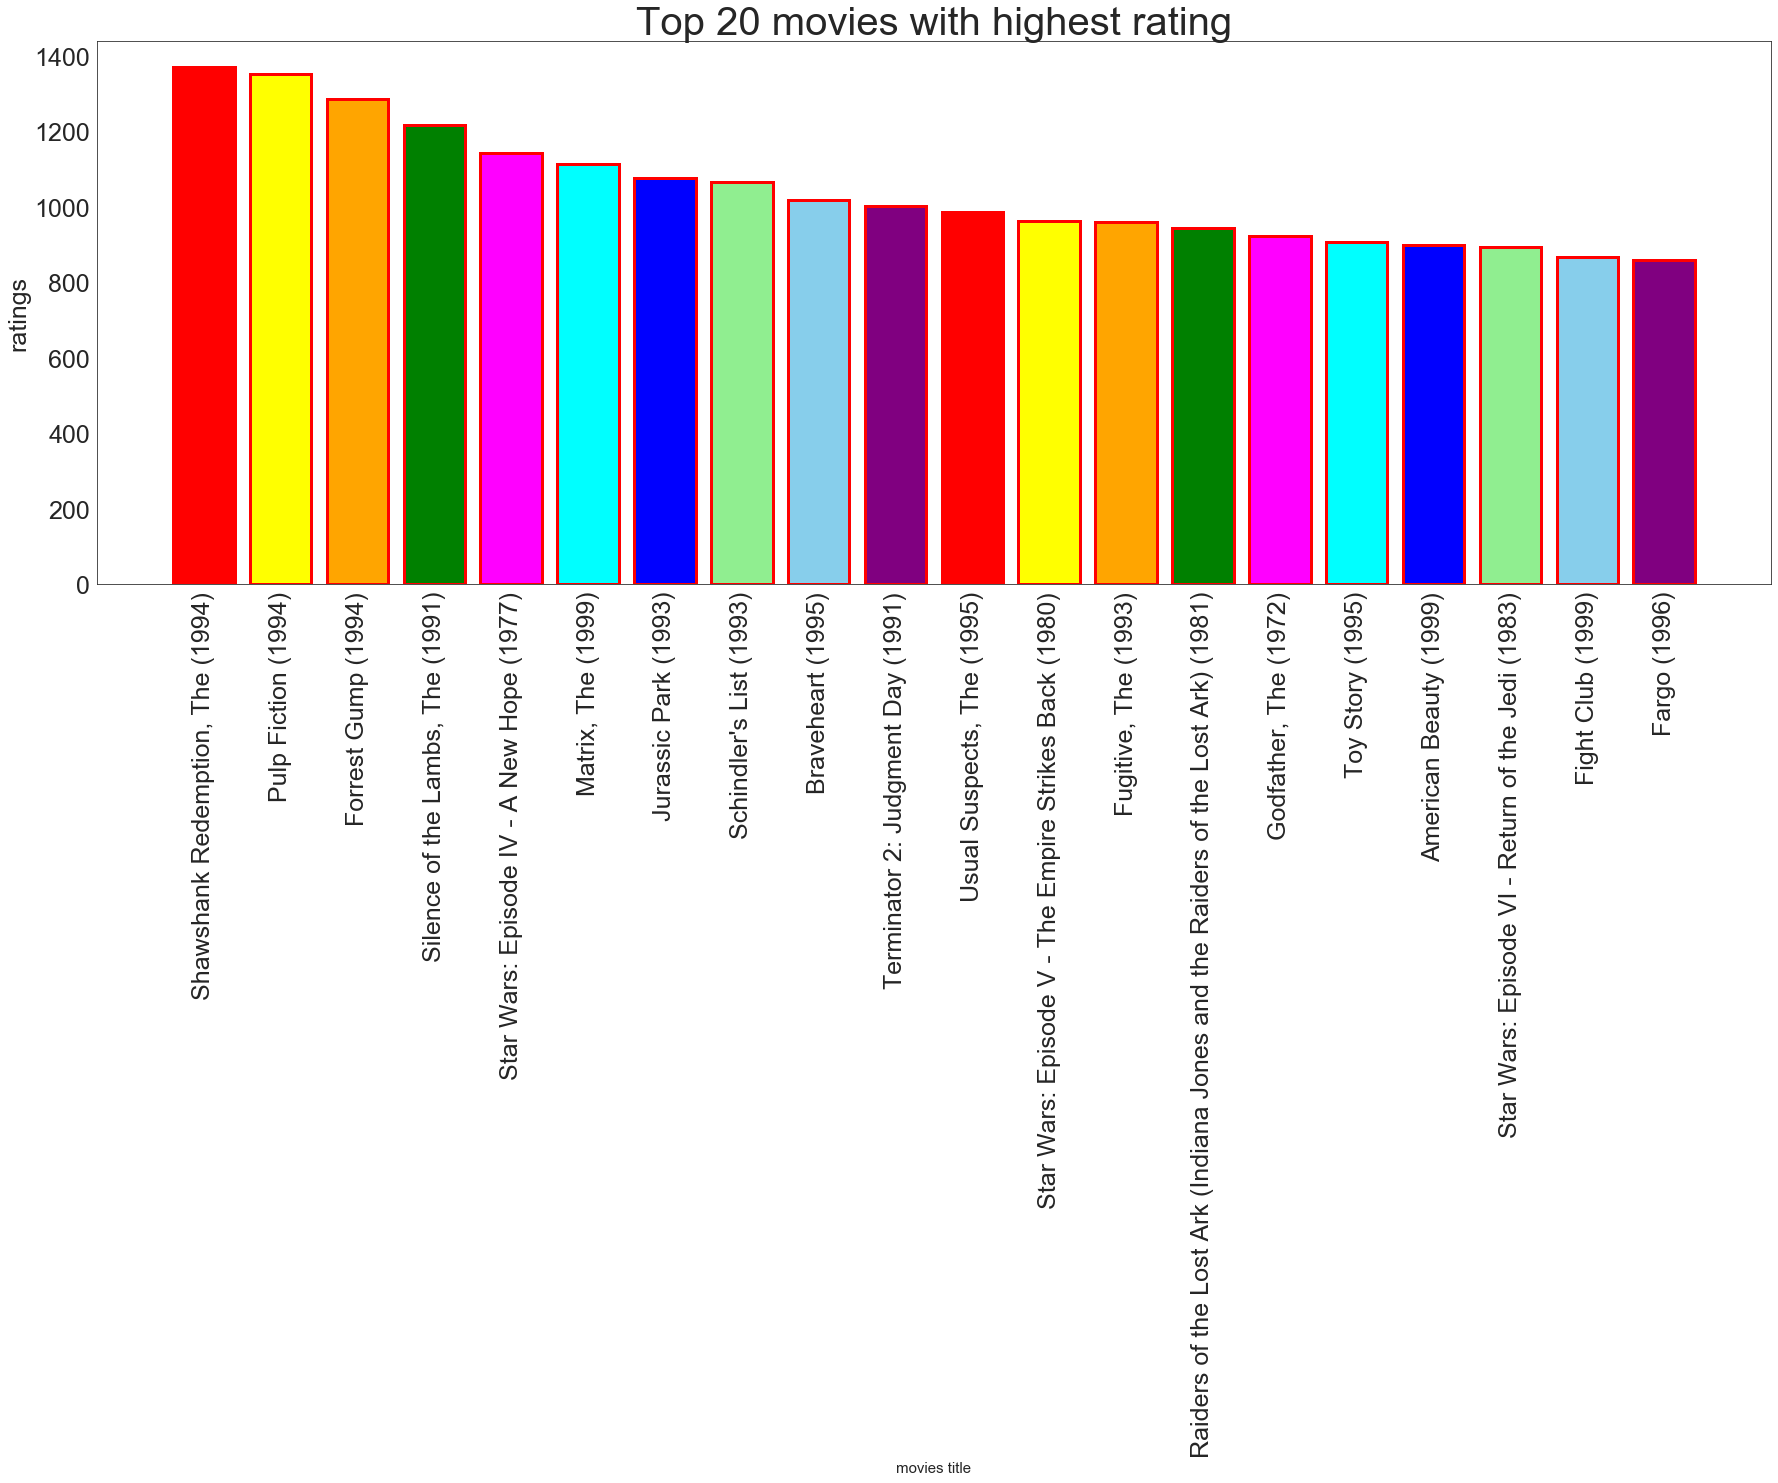

In [23]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=15)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [24]:
# Preparing the Data

x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [25]:
# Split this data into training and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
# Training the Algorithm using K-Nearest Neighbour

from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors( n_neighbors=7)
model.fit(x)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                 radius=1.0)